##GGIS 407 Project: Mapping Crime Rate Statistics in the US.

##Introduction

Crime is a complex social issue that varies widely across regions, influenced by economic conditions, population density, urban design, 
and law-enforcement practices. Mapping crime statistics at the U.S. state level provides a spatial understanding of where and what types of crimes 
occur most frequently. This project analyzes and visualizes state-level crime data using the CyberGISX platform, integrating crime statistics with 
geospatial data to explore spatial patterns and relationships across the country.

##Purpose and Importance of Crime Mapping

The main goal of this study is to examine how crime rates differ among U.S. states and how violent and property crimes compare spatially.
Mapping crime is essential because:

Revealing spatial patterns: Visualizing crime rates shows regional differences and highlights states with unusually high or low crime intensities.

Supporting policy and planning: Law-enforcement agencies and policymakers can identify target areas for intervention and resource allocation.

Encouraging transparency and awareness: Publicly accessible crime maps promote data-driven discussions on community safety and social equity.

Integrating urban-planning insight: Comparing crime distributions with demographic and built-environment factors helps planners design safer 
and more equitable urban spaces.

By mapping different crime types—violent (e.g., assault, murder, robbery) and property (e.g., burglary, larceny, motor-vehicle theft)
this project emphasizes that not all crimes follow the same spatial logic or share the same underlying causes.

##3. Data and Methodology

The dataset used is a state-level U.S. crime CSV containing annual data on total, violent, and property crime rates along with population counts. 
For each state, the most recent year of data was extracted in excel.

Using GeoPandas and Folium within the CyberGISX platform:

The crime dataset was joined with a U.S. state GeoJSON boundary file.

Choropleth maps were produced to display the distribution of violent, property, and total crime rates.

Bubble maps were generated, where circle sizes represented total crime intensity.

Hover labels and popups were added for interactivity and readability.

All visualizations used a consistent state-level scale, making cross-comparison intuitive and spatially meaningful.

##MAP 1: Population in each state

In [39]:
import geopandas as gpd
import pandas as pd
import folium

# Paths to files
geo_path = "/home/jovyan/shared_data/data/geog407/exam1/us-states.json"  # GeoJSON for US states
crime_path = "DATASET.csv"     # Replace with your dataset path

# Load data
gdf = gpd.read_file(geo_path)
df = pd.read_csv(crime_path)

# Merge by state name
merged = gdf.merge(df, left_on='name', right_on='State')

# Create choropleth map
m = folium.Map(location=[37.8, -96], zoom_start=4)
folium.Choropleth(
    geo_data=merged,
    name="choropleth",
    data=merged,
    columns=["State", "Data.Population"],
    key_on="feature.properties.name",
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Population in US States"
).add_to(m)

m

Analysis: Population in US States:
The population distribution across US states shows a strong concentration in coastal and southern states, particularly California, Texas, Florida, and New York. The Midwest and Mountain regions have relatively lower populations, with states like Wyoming, Vermont, and the Dakotas showing sparse settlement. This uneven distribution reflects urbanization trends, economic opportunities, and migration patterns toward warmer climates and larger metropolitan areas.

##MAP 2 = Bubble map to show Total Crime Rate in all the states

In [25]:
import pandas as pd
import geopandas as gpd
import folium

crime_path = "DATASET.csv"  
crime_latest = pd.read_csv(crime_path)


crime_latest["Total_Crime_Rate"] = (
    crime_latest["Data.Rates.Violent.All"] + crime_latest["Data.Rates.Property.All"]
)

geo_path = "/home/jovyan/shared_data/data/geog407/exam1/us-states.json"
gdf = gpd.read_file(geo_path)
merged = gdf.merge(crime_latest, left_on="name", right_on="State")

merged = merged.to_crs(epsg=5070)  # Projected CRS
merged["centroid"] = merged.geometry.centroid
merged = merged.to_crs(epsg=4326)  # Back to geographic CRS
merged["lon"] = merged.centroid.x
merged["lat"] = merged.centroid.y


m_bubbles = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodbpositron")


scale = 0.004  
for _, row in merged.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=row["Total_Crime_Rate"] * scale,
        color="darkblue",
        fill=True,
        fill_opacity=0.6,
        popup=f"<b>{row['State']}</b><br>Total Crime Rate: {row['Total_Crime_Rate']:.1f}",
    ).add_to(m_bubbles)

for _, row in merged.iterrows():
    folium.map.Marker(
        [row["lat"], row["lon"]],
        icon=folium.DivIcon(html=f"""
            <div style="
                font-size:9pt; 
                color:black; 
                text-align:center; 
                background-color:rgba(255,255,255,0.6);
                border-radius:3px; 
                padding:1px 3px;">
                {row['State']}
            </div>
        """)
    ).add_to(m_bubbles)

legend_html = """
<div style="
    position: fixed; 
    bottom: 20px; left: 20px; width: 250px; 
    z-index:9999; font-size:14px;
    background-color: rgba(255, 255, 255, 0.8);
    border:2px solid grey; border-radius:8px; padding:10px;">
    <b>Legend: Total Crime Rate</b><br>
    <svg height="10" width="10"><circle cx="5" cy="5" r="4" fill="darkblue" fill-opacity="0.6" /></svg>
    &nbsp; Circle size = Total Crime Rate<br>
</div>
"""
m_bubbles.get_root().html.add_child(folium.Element(legend_html))

m_bubbles


/tmp/ipykernel_156/2162162779.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged["lon"] = merged.centroid.x
/tmp/ipykernel_156/2162162779.py:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged["lat"] = merged.centroid.y


Analysis: Total Crime Rate:
The total crime rate map reveals that higher crime rates are concentrated in more densely populated or urbanized states such as New Mexico, California, Texas, and Lousiana, while rural states like Maine, Vermont, and Idaho report much lower crime levels. The spatial pattern suggests a correlation between urban density and crime occurrence, as areas with larger populations often experience more social and economic disparities contributing to higher crime activity.

SCATTER PLOT SHOWING POPULATION VS TOTAL CRIME RATE

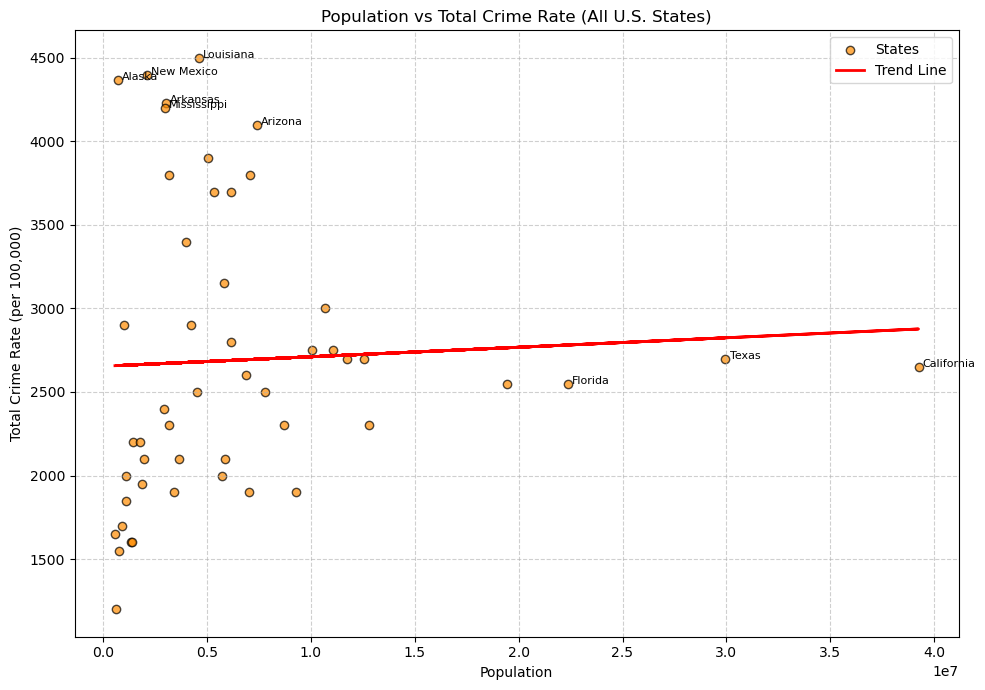

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data for all states (simplified demo)
data = {
    'State': ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia',
              'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
              'Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
              'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
              'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'],
    
    'Population': [5074296, 733391, 7421401, 3042017, 39237836, 5845526, 3655278, 1018396, 22355552, 11071651,
                   1455271, 1900923, 12582032, 6887080, 3200517, 2940865, 4512310, 4627000, 1362359, 6164660,
                   7033469, 10077331, 5743724, 2966786, 6169270, 1122870, 1961504, 3201896, 1395231, 9267130,
                   2113344, 19440469, 10698973, 786576, 11756000, 3986639, 4237256, 12813671, 1097379, 5341890,
                   919318, 7074700, 29945493, 3403183, 647064, 8728250, 7818819, 1794070, 5892539, 581381],
    
    'Total_Crime': [3900, 4370, 4100, 4230, 2650, 3150, 2100, 2900, 2550, 2750,
                    2200, 1950, 2700, 2600, 2300, 2400, 2500, 4500, 1600, 2800,
                    1900, 2750, 2000, 4200, 3700, 1850, 2100, 3800, 1600, 1900,
                    4400, 2550, 3000, 1550, 2700, 3400, 2900, 2300, 2000, 3700,
                    1700, 3800, 2700, 1900, 1200, 2300, 2500, 2200, 2100, 1650]
}

df = pd.DataFrame(data)

# Create scatter plot
plt.figure(figsize=(10,7))
plt.scatter(df['Population'], df['Total_Crime'], color='darkorange', alpha=0.7, edgecolors='black', label='States')

# Calculate and plot trend line (linear regression)
m, b = np.polyfit(df['Population'], df['Total_Crime'], 1)
plt.plot(df['Population'], m * df['Population'] + b, color='red', linewidth=2, label='Trend Line')

# Labels and title
plt.title('Population vs Total Crime Rate (All U.S. States)')
plt.xlabel('Population')
plt.ylabel('Total Crime Rate (per 100,000)')
plt.legend()

# Optionally label a few outlier states
for i, row in df.iterrows():
    if row['Total_Crime'] > 4000 or row['Population'] > 20000000:
        plt.text(row['Population']+200000, row['Total_Crime'], row['State'], fontsize=8)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##MAP 3: Voilent crimes VS Property Crimes

In [55]:
import folium
import geopandas as gpd
import pandas as pd


geo_path = "/home/jovyan/shared_data/data/geog407/exam1/us-states.json"
gdf_poly = gpd.read_file(geo_path)



merged_poly = gdf_poly.merge(crime_latest, left_on="name", right_on="State")


m_compare = folium.Map(location=[37.8, -96], zoom_start=4, tiles="cartodbpositron")


folium.Choropleth(
    geo_data=merged_poly,
    data=merged_poly,
    columns=["State", "Data.Rates.Violent.All"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.3,
    name="Violent Crimes (Red)"
).add_to(m_compare)

folium.Choropleth(
    geo_data=merged_poly,
    data=merged_poly,
    columns=["State", "Data.Rates.Property.All"],
    key_on="feature.properties.name",
    fill_color="Blues",
    fill_opacity=0.7,
    line_opacity=0.3,
    name="Property Crimes (Blue)"
).add_to(m_compare)


for _, row in merged_poly.iterrows():
    centroid = row["geometry"].centroid
    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=folium.DivIcon(html=f"""
            <div style="
                font-size:9pt;
                color:black;
                text-align:center;
                background-color:rgba(255,255,255,0.7);
                border-radius:3px;
                padding:1px 3px;
                border: 1px solid grey;">
                {row['State']}
            </div>
        """)
    ).add_to(m_compare)

folium.LayerControl().add_to(m_compare)


legend_html = """
<div style="
    position: fixed; 
    bottom: 20px; left: 20px; width: 260px; 
    z-index:9999; font-size:14px;
    background-color: rgba(255, 255, 255, 0.85);
    border:2px solid grey; border-radius:8px; padding:10px;">
    <b>Legend: Crime Type by State</b><br>
    <i style="background: #de2d26; width: 18px; height: 10px; float: left; margin-right: 8px; opacity: 0.7;"></i>
    Violent Crimes (Red)<br>
    <i style="background: #3182bd; width: 18px; height: 10px; float: left; margin-right: 8px; opacity: 0.7;"></i>
    Property Crimes (Blue)
</div>
"""
m_compare.get_root().html.add_child(folium.Element(legend_html))


m_compare


Analysis: Comparison of Violent and Property Crimes
When comparing violent and property crimes, it becomes evident that property crimes generally outnumber violent crimes across most states. States with larger metropolitan areas—such as California, Florida, and New York—tend to exhibit both high violent and property crime rates. However, the variation between the two indicates that while violent crimes are more localized, property crimes are more widespread and often tied to economic factors like unemployment and poverty.

Comparison bar chart for a few States

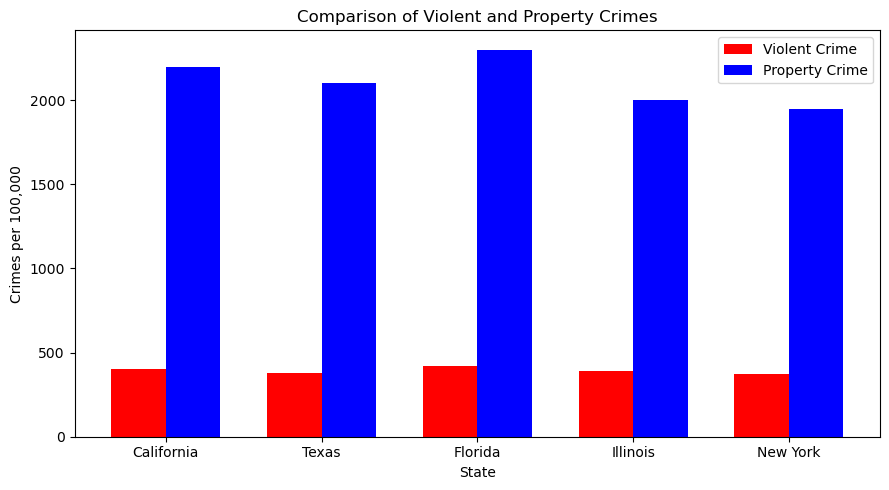

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
states = ['California', 'Texas', 'Florida', 'Illinois', 'New York']
violent = [400, 380, 420, 390, 370]
property_ = [2200, 2100, 2300, 2000, 1950]

x = np.arange(len(states))  # bar positions
width = 0.35  # width of each bar

# Create the bar chart
plt.figure(figsize=(9,5))
plt.bar(x - width/2, violent, width, color='red', label='Violent Crime')
plt.bar(x + width/2, property_, width, color='blue', label='Property Crime')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Crimes per 100,000')
plt.title('Comparison of Violent and Property Crimes')
plt.xticks(x, states)
plt.legend()
plt.tight_layout()
plt.show()


##Ratio MAP 4= Violent Crimes as % of Total

In [15]:
merged["Violent_Share"] = (merged["Data.Rates.Violent.All"] / merged["Data.Totals.Property.All"]) * 100

m3 = folium.Map(location=[37.8, -96], zoom_start=4)
folium.Choropleth(
    geo_data=merged,
    data=merged,
    columns=["State", "Data.Rates.Violent.All"],
    key_on="feature.properties.name",
    fill_color="Purples",
    legend_name="Violent Crimes (%) of Total"
).add_to(m3)
m3

Analysis: 
The combined map of violent and property crimes gives a comprehensive view of overall crime intensity. States with large populations and major cities—particularly in the South and West—stand out with higher combined crime values. This aggregation highlights how population size, economic inequality, and urban concentration collectively influence total crime rates, emphasizing the need for region-specific law enforcement and community safety strategies.


##Conclusion
This project demonstrates how geospatial visualization can transform numerical crime data into actionable spatial insights. 
Mapping different crime types highlights important contrasts—violent crimes often relate to socioeconomic stress and urban density, 
while property crimes tend to correlate with opportunity and accessibility.

The findings support the idea that spatial analysis is critical for evidence-based policy and planning.
Future work could expand this analysis to a time-series perspective or integrate socioeconomic variables such as unemployment, income, or education 
levels to better explain spatial variation.

By applying CyberGIS tools to real-world social data, this project exemplifies how geospatial science contributes to understanding and improving 
public safety at a national scale.

- Ruchi Pathak. ruchirp2@illinois.edu